In [1]:
# Krishna Thiyagarajan & Abhinav Jain
# Prof. Keene
# Machine Learning - Assignment 2
# Predective Destribution

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Values from book

N = [1, 2, 4, 25]
sigma = 0.2
beta = 1.0/np.power(sigma, 2.0)
alpha = 2
weights = 9

In [4]:
# Generate spans, ground truths and sampled values (25 samples)

x_span = np.linspace(0, 1, 100)
y_groundtruth = np.sin(2 * np.pi * x_span)

x_n = np.random.uniform(0, 1, 25)
t_n = np.sin(2 * np.pi * x_n)
noise = np.random.normal(0, sigma, 25)
t_n = t_n + noise
mu_n = np.zeros((25, 100))
S_n = np.zeros((25, 100))


In [5]:
# Set parameters for Gaussian Basis Function (9 weights)

u = np.linspace(0, 2.5, weights)
s = 0.2

In [6]:
# Create phi with 9 Gaussian basis functions for x_n at sample point
# Add a column for each new sample
# Calulcate SN and mN thus
phi = np.array([np.exp(-np.multiply(np.ones(weights)*x_n[0] - u, np.ones(weights)*x_n[0] - u)/(2.0*s*s))])
for i in range (25):
    if i != 0:
        phi = np.concatenate((phi, np.array([np.exp(-np.multiply(np.ones(weights)*x_n[i] - u, np.ones(weights)*x_n[i] - u)/(2.0*s*s))])), axis=0)
    phiT = phi.T
    SN_inv = (alpha * np.identity(weights)) + (beta * phiT.dot(phi))
    SN = np.linalg.inv(SN_inv)
    mN = beta * SN.dot(phiT).dot(t_n[0:i + 1].T)
    
    # For plotting, go through 100 points on the span
    # Generate phi(X) for each point
    # Calculate mu_n and S_n at each point
    for j in range (100):
        phiX = np.array([np.exp(-np.multiply(np.ones(weights)*x_span[j] - u, np.ones(weights)*x_span[j] - u)/(2.0*s*s))])
        mu_n[i, j] = mN.T.flatten().dot(phiX.flatten())
        S_n[i, j] = (1/beta) + phiX.dot(SN).dot(phiX.T)

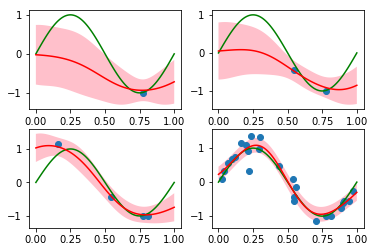

In [7]:
# Plot everything
for i in N:
    plt.subplot(2, 2, N.index(i) + 1)
    plt.plot(x_span, y_groundtruth, 'g')
    plt.plot(x_span, mu_n[i - 1], 'r')
    plt.fill_between(x_span, mu_n[i - 1] + np.sqrt(S_n[i - 1]), mu_n[i - 1] - np.sqrt(S_n[i - 1]), facecolor='pink')
    plt.scatter(x_n[0:i], t_n[0:i])